In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# vizalize the data
col_headers = ['age','sex','chest_pain_type','resting_bp','serum_cholesterol', 'fasting_blood_sugar',
           'resting_ecg_results', 'max_heart_rate','exercise_induced', 'oldpeak', 'slope_of_the_peak',
           'number_of_major_vessels', 'thal', 'response']
heart_data = pd.read_csv('heart.dat', sep=' ', names=col_headers)

In [3]:
heart_data.head()

,age,sex,chest_pain_type,resting_bp,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced,oldpeak,slope_of_the_peak,number_of_major_vessels,thal,response
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
# check if there are missing values
heart_data.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_bp                 0
serum_cholesterol          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate             0
exercise_induced           0
oldpeak                    0
slope_of_the_peak          0
number_of_major_vessels    0
thal                       0
response                   0
dtype: int64

In [5]:
# check data types
heart_data.dtypes

age                        float64
sex                        float64
chest_pain_type            float64
resting_bp                 float64
serum_cholesterol          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate             float64
exercise_induced           float64
oldpeak                    float64
slope_of_the_peak          float64
number_of_major_vessels    float64
thal                       float64
response                     int64
dtype: object

In [6]:
# separate the features from response
x = heart_data.drop(columns=['response'])
# heart_data['response'] = heart_data['response'].replace(1, 0)
# heart_data['response'] = heart_data['response'].replace(2, 1)
y = heart_data['response'].values

In [7]:
# define model layer architecture
# we will have 13 input nodes (one for each feature), 8 hidden nodes, and 1 output node for classification

class NeuralNet:
    def __init__(self, layers=(13,8,1), iterations=100, learning_rate=0.001):
        self.params = {}
        self.layers = layers
        self.x = None
        self.y = None
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.loss = []
        self.m = None
    
    # initialize model paramenters
    def initialize_params(self):
        np.random.seed(1)
        self.params['W1'] = np.random.randn(self.layers[1], self.layers[0]) * 0.01
        self.params['b1'] = np.zeros((self.layers[1], 1))
        self.params['W2'] = np.random.randn(self.layers[2], self.layers[1]) * 0.01
        self.params['b2'] = np.zeros((self.layers[2], 1))

    # implement the sigmoid function
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    # implement the relu function
    def relu(self, z):
        return np.maximum(0, z)
    
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def dTanh(self, a):
        return 1- np.power(a, 2)
    
    # calculate the entropy loss
    def calculate_cost(self, yhat, y):
#         m = len(y)
        return (-1/self.m) * np.sum(np.multiply(y, np.log(yhat)) + np.multiply((1-y), np.log(1-yhat)))        
    
    # implement forward propagation
    def forward_propagation(self):

        Z1 = np.dot(self.params['W1'], self.x) + self.params['b1']
#         A1 = self.relu(Z1)
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.params['W2'], A1) + self.params['b2']
        A2 = self.sigmoid(Z2)
        loss = self.calculate_cost(A2, self.y)
        
        self.params['Z1'] = Z1
        self.params['A1'] = A1
        self.params['Z2'] = Z2
        self.params['A2'] = A2
        
        return A2, loss
    
    # implement back prop
    def back_propagation(self, yhat):
        dZ2 = self.params['A2'] - self.y
        dW2 = (1/self.m) * np.dot(dZ2, self.params['A1'].T)
        db2 = (1/self.m) * np.sum(dZ2, axis=1, keepdims=True)
#         dZ1 = np.dot(self.params['W2'].T, dZ2) * (1 - self.params['Z1']**2)
#         dZ1 = np.dot(self.params['W2'].T, dZ2) * self.dRelu(self.params['Z1'])
        dZ1 = np.dot(self.params['W2'].T, dZ2) * self.dTanh(self.params['A1'])
        dW1 = (1/self.m) * np.dot(dZ1, self.x.T)
        db1 = (1/self.m) * np.sum(dZ1, axis=1, keepdims=True)
        
        self.params['W1'] = self.params['W1'] - self.learning_rate * dW1
        self.params['b1'] = self.params['b1'] - self.learning_rate * db1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dW2
        self.params['b2'] = self.params['b2'] - self.learning_rate * db2
        
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.m = x.shape[1]
        self.initialize_params()
        
        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
    
    def predict(self, x):
        Z1 = np.dot(self.params['W1'], x) + self.params['b1']
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.params['W2'], A1) + self.params['b2']
        A2 = self.sigmoid(Z2)
        return np.round(A2)
    
    def accuracy(self, y, yhat):        
        return (np.sum(y == yhat)/y.shape[1]) * 100
    
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()    

In [8]:
# transform response: Absence(1) or presence(2) of heart disease --> Absence(0) or presence(1) of heart disease
y = np.where(y==1, 0, 1)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=2)
sc = StandardScaler()
sc.fit(xTrain)
xTrain = sc.transform(xTrain)
xTest = sc.transform(xTest)
n = xTrain.shape[1]
mTrain = xTrain.shape[0]
mTest = xTest.shape[0]
xTrain = xTrain.reshape(n,mTrain)
xTest = xTest.reshape(n,mTest)
yTrain = yTrain.reshape(1, mTrain)
yTest = yTest.reshape(1, mTest)

In [11]:
nn = NeuralNet(layers=(13,8,1), iterations=10000, learning_rate=0.001)
nn.fit(xTrain, yTrain)
train_pred = nn.predict(xTrain)
test_pred = nn.predict(xTest)
train_acc = nn.accuracy(yTrain, train_pred)
test_acc = nn.accuracy(yTest, test_pred)
train_acc, test_acc

(54.629629629629626, 59.25925925925925)

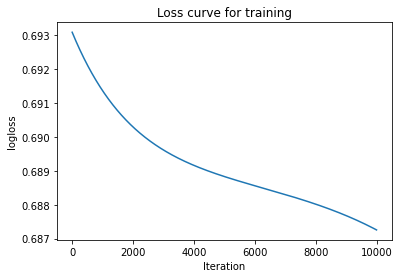

In [12]:
nn.plot_loss()